In [135]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats
import itertools
import string
import matplotlib.patches
import netCDF4
import cftime
import calendar

import glob
import pandas

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

# import clm400 data

In [3]:
!ls /beegfs/DATA/pritchard/blangenb/CESM_ARCHIVE/B_1850_CAM5.30years.cam0400.clm0400

atm  cpl  dart	glc  ice  lnd  ocn  rest  rof  wav


In [8]:
data_dir = '/beegfs/DATA/pritchard/blangenb/CESM_ARCHIVE/B_1850_CAM5.30years.cam0400.clm0400/'

In [45]:
file_list = sorted(glob.glob('/beegfs/DATA/pritchard/blangenb/CESM_ARCHIVE/B_1850_CAM5.30years.cam0400.clm0400/atm/hist/*cam*'))

In [9]:
cont_cam_mfds = xarray.open_mfdataset(data_dir + 'atm/hist/*cam*.nc', decode_times=False)

In [74]:
time_400 = cont_cam_mfds['time']
time_400_values = time_400.values
PRECC_400 = cont_cam_mfds['PRECC']
PRECL_400 = cont_cam_mfds['PRECL']

# import clm1000 data

In [15]:
data_dir = '/beegfs/DATA/pritchard/blangenb/CESM_ARCHIVE/B_1850_CAM5.30years.cam0400.clm1000/'

In [19]:
phys_cam_mfds = xarray.open_mfdataset(data_dir + 'atm/hist/*cam*.nc', decode_times=False)

In [75]:
time_1000 = phys_cam_mfds['time'].values
PRECC_1000 = phys_cam_mfds['PRECC']
PRECL_1000 = phys_cam_mfds['PRECL']

# convert time

In [71]:
time_converted = netCDF4.num2date(time_400, time_400.units, time_400.calendar)

In [72]:
time_manual = []
for t_idx in range(time_converted.size):
    year=time_converted[t_idx].year
    month=time_converted[t_idx].month-1
    if month==0:
        month=12
    time_manual.append(cftime.DatetimeNoLeap(year,month,15))

# calculate total precip, subset variables to proper lat/lon

In [77]:
PRECT_400 = PRECC_400+PRECL_400
PRECT_1000 = PRECC_1000+PRECL_1000

In [79]:
PRECT_1000_sa = PRECT_1000.sel(lat=slice(-30.,30.),lon=slice(270.,330.)).values
PRECT_400_sa = PRECT_400.sel(lat=slice(-30.,30.),lon=slice(270.,330.)).values

## calculate lat lon subset

In [84]:
lat_subset = PRECT_400.sel(lat=slice(-30.,30.),lon=slice(270.,330.))['lat'].values
lon_subset = PRECT_400.sel(lat=slice(-30.,30.),lon=slice(270.,330.))['lon'].values

# calculate prect (total precip)

In [80]:
time_indices_djf = [t.month in [12,1,2] for t in time_manual]
time_indices_mam = [t.month in [3,4,5] for t in time_manual]
time_indices_jja = [t.month in [6,7,8] for t in time_manual]
time_indices_son = [t.month in [9,10,11] for t in time_manual]

In [130]:
time_indices_jan = [t.month in [1] for t in time_manual]
time_indices_feb = [t.month in [2] for t in time_manual]
time_indices_mar = [t.month in [3] for t in time_manual]
time_indices_apr = [t.month in [4] for t in time_manual]
time_indices_may = [t.month in [5] for t in time_manual]
time_indices_jun = [t.month in [6] for t in time_manual]
time_indices_jul = [t.month in [7] for t in time_manual]
time_indices_aug = [t.month in [8] for t in time_manual]
time_indices_sep = [t.month in [9] for t in time_manual]
time_indices_oct = [t.month in [10] for t in time_manual]
time_indices_nov = [t.month in [11] for t in time_manual]
time_indices_dec = [t.month in [12] for t in time_manual]

In [81]:
PRECT_400_sa_djf = PRECT_400_sa[time_indices_djf,:,:]
PRECT_1000_sa_djf = PRECT_1000_sa[time_indices_djf,:,:]

PRECT_400_sa_mam = PRECT_400_sa[time_indices_mam,:,:]
PRECT_1000_sa_mam = PRECT_1000_sa[time_indices_mam,:,:]

PRECT_400_sa_jja = PRECT_400_sa[time_indices_jja,:,:]
PRECT_1000_sa_jja = PRECT_1000_sa[time_indices_jja,:,:]

PRECT_400_sa_son = PRECT_400_sa[time_indices_son,:,:]
PRECT_1000_sa_son = PRECT_1000_sa[time_indices_son,:,:]

In [141]:
PRECT_400_sa_jan = PRECT_400_sa[time_indices_jan,:,:].mean(axis=0)
PRECT_400_sa_feb = PRECT_400_sa[time_indices_feb,:,:].mean(axis=0)
PRECT_400_sa_mar = PRECT_400_sa[time_indices_mar,:,:].mean(axis=0)
PRECT_400_sa_apr = PRECT_400_sa[time_indices_apr,:,:].mean(axis=0)
PRECT_400_sa_may = PRECT_400_sa[time_indices_may,:,:].mean(axis=0)
PRECT_400_sa_jun = PRECT_400_sa[time_indices_jun,:,:].mean(axis=0)
PRECT_400_sa_jul = PRECT_400_sa[time_indices_jul,:,:].mean(axis=0)
PRECT_400_sa_aug = PRECT_400_sa[time_indices_aug,:,:].mean(axis=0)
PRECT_400_sa_sep = PRECT_400_sa[time_indices_sep,:,:].mean(axis=0)
PRECT_400_sa_oct = PRECT_400_sa[time_indices_oct,:,:].mean(axis=0)
PRECT_400_sa_nov = PRECT_400_sa[time_indices_nov,:,:].mean(axis=0)
PRECT_400_sa_dec = PRECT_400_sa[time_indices_dec,:,:].mean(axis=0)

PRECT_400_sa_month_list = [\
PRECT_400_sa_jan, \
PRECT_400_sa_feb, \
PRECT_400_sa_mar, \
PRECT_400_sa_apr, \
PRECT_400_sa_may, \
PRECT_400_sa_jun, \
PRECT_400_sa_jul, \
PRECT_400_sa_aug, \
PRECT_400_sa_sep, \
PRECT_400_sa_oct, \
PRECT_400_sa_nov, \
PRECT_400_sa_dec]

In [140]:
PRECT_1000_sa_jan = PRECT_1000_sa[time_indices_jan,:,:].mean(axis=0)
PRECT_1000_sa_feb = PRECT_1000_sa[time_indices_feb,:,:].mean(axis=0)
PRECT_1000_sa_mar = PRECT_1000_sa[time_indices_mar,:,:].mean(axis=0)
PRECT_1000_sa_apr = PRECT_1000_sa[time_indices_apr,:,:].mean(axis=0)
PRECT_1000_sa_may = PRECT_1000_sa[time_indices_may,:,:].mean(axis=0)
PRECT_1000_sa_jun = PRECT_1000_sa[time_indices_jun,:,:].mean(axis=0)
PRECT_1000_sa_jul = PRECT_1000_sa[time_indices_jul,:,:].mean(axis=0)
PRECT_1000_sa_aug = PRECT_1000_sa[time_indices_aug,:,:].mean(axis=0)
PRECT_1000_sa_sep = PRECT_1000_sa[time_indices_sep,:,:].mean(axis=0)
PRECT_1000_sa_oct = PRECT_1000_sa[time_indices_oct,:,:].mean(axis=0)
PRECT_1000_sa_nov = PRECT_1000_sa[time_indices_nov,:,:].mean(axis=0)
PRECT_1000_sa_dec = PRECT_1000_sa[time_indices_dec,:,:].mean(axis=0)

PRECT_1000_sa_month_list = [\
PRECT_1000_sa_jan, \
PRECT_1000_sa_feb, \
PRECT_1000_sa_mar, \
PRECT_1000_sa_apr, \
PRECT_1000_sa_may, \
PRECT_1000_sa_jun, \
PRECT_1000_sa_jul, \
PRECT_1000_sa_aug, \
PRECT_1000_sa_sep, \
PRECT_1000_sa_oct, \
PRECT_1000_sa_nov, \
PRECT_1000_sa_dec]

# calculate control mean

In [88]:
PRECT_400_djf_mean = numpy.mean(PRECT_400_sa_djf, axis=0)
PRECT_400_mam_mean = numpy.mean(PRECT_400_sa_mam, axis=0)
PRECT_400_jja_mean = numpy.mean(PRECT_400_sa_jja, axis=0)
PRECT_400_son_mean = numpy.mean(PRECT_400_sa_son, axis=0)

# calculate phys means

In [175]:
PRECT_1000_djf_mean = numpy.mean(PRECT_1000_sa_djf, axis=0)
PRECT_1000_mam_mean = numpy.mean(PRECT_1000_sa_mam, axis=0)
PRECT_1000_jja_mean = numpy.mean(PRECT_1000_sa_jja, axis=0)
PRECT_1000_son_mean = numpy.mean(PRECT_1000_sa_son, axis=0)

# calculate annual mean

In [176]:
PRECT_400_annual_mean = numpy.mean(PRECT_400_sa, axis=0)
PRECT_1000_annual_mean = numpy.mean(PRECT_1000_sa, axis=0)

# plot control and diffs

# full seasonal cycle by month

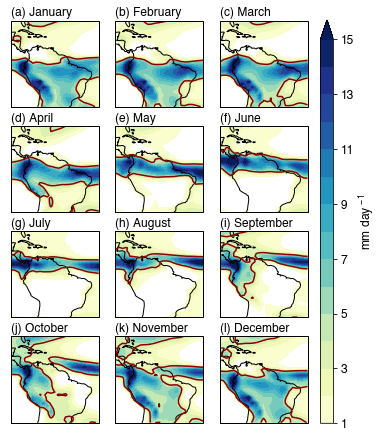

In [174]:
fontsize=12
fig = mp.figure(figsize=(4.5,6))

map_proj = cartopy.crs.PlateCarree()
contour_line = 4

levels_clim = numpy.arange(1,15.1,1)
#levels_diff = numpy.arange(-2,2.1,0.25)

nrows=4
ncols=3

ax_list = []

for m in range(12):

    ax = fig.add_subplot(nrows,ncols,m+1, projection=map_proj)
    contour_plot = ax.contourf(lon_subset,lat_subset, \
                 PRECT_400_sa_month_list[m]*86400.*1000., \
                 levels=levels_clim, \
                 cmap='YlGnBu', \
                 extend='max'
                 )
    ax.contour(lon_subset, lat_subset, \
                PRECT_400_sa_month_list[m]*86400.*1000., \
                levels=[contour_line], colors='darkred')

    # ax8 = fig.add_subplot(428, projection=map_proj)
    # ax8.contourf(lon_subset,lat_subset, \
    #              (PRECT_1000_son_mean-PRECT_400_son_mean)*86400.*1000., \
    #              levels=levels_diff, \
    #              cmap='BrBG', \
    #              extend='both'
    #              )
    # ax8.contour(lon_subset,lat_subset, \
    #             PRECT_400_son_mean*86400.*1000., \
    #             levels=[contour_line], \
    #             colors='darkred', \
    #             linestyles=['-'])
    # ax8.contour(lon_subset,lat_subset, \
    #             PRECT_1000_son_mean*86400.*1000., \
    #             levels=[contour_line], \
    #             colors='firebrick', \
    #             linestyles=['--'], linewidths=[1])

    ax.coastlines()

    ax.text(s='('+string.ascii_lowercase[m]+') '+calendar.month_name[m+1], x=0, y=1.02, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax_list.append(ax)

fig.tight_layout()

axloc_tr = ax_list[2].get_position()
axloc_br = ax_list[11].get_position()

cbar_ax = fig.add_axes([axloc_br.x1+0.04, axloc_br.y0, 0.04, axloc_tr.y1-axloc_br.y0])
cbar = fig.colorbar(contour_plot, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)

fig.savefig('cesm_20years_climatology_monthly.png', dpi=600, bbox_inches='tight')

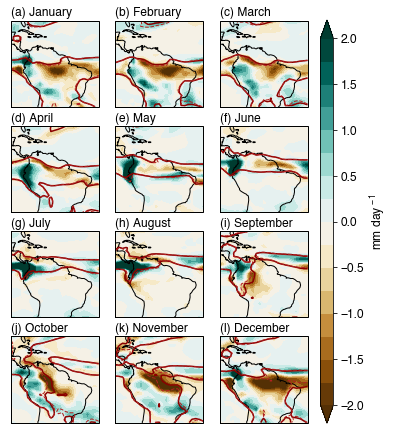

In [170]:
fontsize=12
fig = mp.figure(figsize=(4.5,6))

map_proj = cartopy.crs.PlateCarree()
contour_line = 4

#levels_clim = numpy.arange(1,10.1,1)
levels_diff = numpy.arange(-2,2.1,0.25)

nrows=4
ncols=3

ax_list=[]

for m in range(12):

    ax = fig.add_subplot(nrows,ncols,m+1, projection=map_proj)
#     ax.contourf(lon_subset,lat_subset, \
#                  PRECT_400_sa_month_list[m]*86400.*1000., \
#                  levels=levels_clim, \
#                  cmap='YlGnBu', \
#                  extend='max'
#                  )
#     ax.contour(lon_subset, lat_subset, \
#                 PRECT_400_sa_month_list[m]*86400.*1000., \
#                 levels=[contour_line], colors='darkred')

    contour_plot = ax.contourf(lon_subset,lat_subset, \
                 (PRECT_1000_sa_month_list[m]-PRECT_400_sa_month_list[m])*86400.*1000., \
                 levels=levels_diff, \
                 cmap='BrBG', \
                 extend='both'
                 )
    ax.contour(lon_subset,lat_subset, \
                PRECT_400_sa_month_list[m]*86400.*1000., \
                levels=[contour_line], \
                colors='darkred', \
                linestyles=['-'])
    ax.contour(lon_subset,lat_subset, \
                PRECT_1000_sa_month_list[m]*86400.*1000., \
                levels=[contour_line], \
                colors='firebrick', \
                linestyles=['--'], linewidths=[1])

    ax.coastlines()

    ax.text(s='('+string.ascii_lowercase[m]+') '+calendar.month_name[m+1], x=0, y=1.02, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax_list.append(ax)

fig.tight_layout()

axloc_tr = ax_list[2].get_position()
axloc_br = ax_list[11].get_position()

cbar_ax = fig.add_axes([axloc_br.x1+0.04, axloc_br.y0, 0.04, axloc_tr.y1-axloc_br.y0])
cbar = fig.colorbar(contour_plot, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)

fig.savefig('cesm_20years_absolute_change_monthly.png', dpi=600, bbox_inches='tight')


# plot as percent change

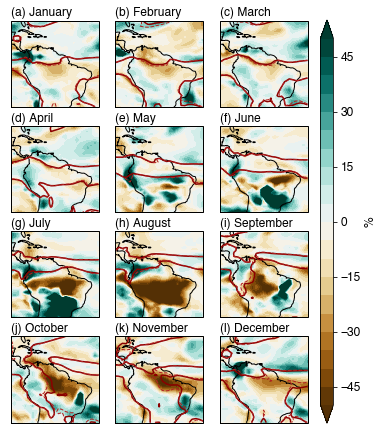

In [171]:
fontsize=12
fig = mp.figure(figsize=(4.5,6))

map_proj = cartopy.crs.PlateCarree()
contour_line = 4

#levels_clim = numpy.arange(-100,101,20)
levels_diff = numpy.arange(-50,51,5)

nrows=4
ncols=3

ax_list = []

for m in range(12):

    ax = fig.add_subplot(nrows,ncols,m+1, projection=map_proj)

#     contour_plot = ax.pcolormesh(lon_subset,lat_subset, \
#                              ((PRECT_1000_sa_month_list[m]-PRECT_400_sa_month_list[m])/PRECT_400_sa_month_list[m])*100., \
#                              vmin=levels_diff.min(), vmax=levels_diff.max(), \
#                              cmap='BrBG', \
#                              )

    contour_plot = ax.contourf(lon_subset,lat_subset, \
                             ((PRECT_1000_sa_month_list[m]-PRECT_400_sa_month_list[m])/PRECT_400_sa_month_list[m])*100., \
                             levels=levels_diff, \
                             cmap='BrBG', \
                             extend='both'
                             )
    ax.contour(lon_subset,lat_subset, \
                PRECT_400_sa_month_list[m]*86400.*1000., \
                levels=[contour_line], \
                colors='darkred', \
                linestyles=['-'])
    ax.contour(lon_subset,lat_subset, \
                PRECT_1000_sa_month_list[m]*86400.*1000., \
                levels=[contour_line], \
                colors='firebrick', \
                linestyles=['--'], linewidths=[1])

    ax.coastlines()

    ax.text(s='('+string.ascii_lowercase[m]+') '+calendar.month_name[m+1], x=0, y=1.02, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax_list.append(ax)

fig.tight_layout()

axloc_tr = ax_list[2].get_position()
axloc_br = ax_list[11].get_position()

cbar_ax = fig.add_axes([axloc_br.x1+0.04, axloc_br.y0, 0.04, axloc_tr.y1-axloc_br.y0])
cbar = fig.colorbar(contour_plot, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('%', fontsize=fontsize)

fig.savefig('cesm_20years_percent_change_monthly.png', dpi=600, bbox_inches='tight')


# plot annual mean change

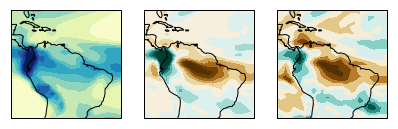

In [191]:
fontsize=12
fig = mp.figure(figsize=(6.75,4.5))

map_proj = cartopy.crs.PlateCarree()
contour_line = 4

# levels_clim = numpy.arange(-100,101,20)
# levels_diff = numpy.arange(-50,51,5)
levels_clim = numpy.arange(0,10.1,1)
levels_diff = numpy.arange(-1,1.1,0.2)
levels_diff_percent = numpy.arange(-20,21,5)

nrows=2
ncols=3


ax = fig.add_subplot(nrows,ncols,1, projection=map_proj)
contour_plot_clim = ax.contourf(lon_subset, lat_subset, \
                           PRECT_400_annual_mean*86400.*1000., \
                           levels=levels_clim, \
                           cmap='YlGnBu', extend='max')
ax.coastlines()


ax = fig.add_subplot(nrows,ncols,2, projection=map_proj)
contour_plot_diff = ax.contourf(lon_subset, lat_subset, \
                           (PRECT_1000_annual_mean-PRECT_400_annual_mean)*86400.*1000., \
                           levels=levels_diff, \
                           cmap='BrBG', extend='both')
ax.coastlines()


ax = fig.add_subplot(nrows,ncols,3, projection=map_proj)
contour_plot_diff = ax.contourf(lon_subset, lat_subset, \
                           ((PRECT_1000_annual_mean-PRECT_400_annual_mean)/PRECT_400_annual_mean)*100., \
                           levels=levels_diff_percent, \
                           cmap='BrBG', extend='both')
ax.coastlines()

In [28]:
PRECT_diff = PRECT_1000.mean(dim='time')-PRECT_400.mean(dim='time')
PRECT_diff = PRECT_diff.values

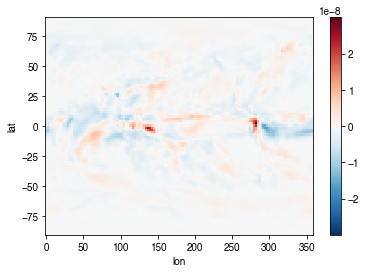

In [29]:
PRECT_diff.plot()

In [56]:
PRECT_1000_sa = PRECT_1000.sel(lat=slice(-30.,30.),lon=slice(270.,330.))
PRECT_400_sa = PRECT_400.sel(lat=slice(-30.,30.),lon=slice(270.,330.))

In [71]:
PRECT_400_sa_tm = PRECT_400_sa.mean(dim='time')
PRECT_1000_sa_tm = PRECT_1000_sa.mean(dim='time')

In [72]:
PRECT_sa_tm_diffs = PRECT_1000_sa_tm.values - PRECT_400_sa_tm.values

(3651, 32, 25)

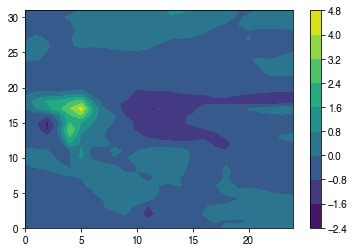

In [73]:
mp.contourf(PRECT_sa_tm_diffs*84600.*1000.)
mp.colorbar()
PRECT_400_sa.shape

Text(0,1.02,'10-year mean $\\Delta$ precip.')

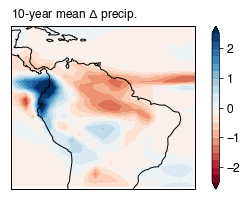

In [100]:
fontsize=12

map_crs = cartopy.crs.PlateCarree()
data_crs = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(6,3))
ax = fig.add_subplot(111, projection=map_crs)
ax.coastlines()

ax.set_extent([270,330,-27,20])

levels = numpy.arange(-2.5,2.6,0.25)
contour_map = ax.contourf(PRECT_400_sa['lon'].values, \
                          PRECT_400_sa['lat'].values, \
                          PRECT_sa_tm_diffs*86400*1000, \
                          cmap='RdBu', \
                          levels=levels, \
                          transform=data_crs, \
                          extend='both')

cbar = mp.colorbar(contour_map)
cbar.set_ticks(levels[2::4])
cbar.ax.tick_params(labelsize=fontsize)

ax.text(s='10-year mean $\Delta$ precip.', \
        x=0, y=1.02, \
        ha='left', va='bottom', \
        transform=ax.transAxes, \
        fontsize=fontsize)

# calculate precipitable water and save

In [20]:
cont_prw = numpy.load('DATA_prw_400.npy')
phys_prw = numpy.load('DATA_prw_1000.npy')

# get time stamps

In [22]:
time_datetimes = pandas.to_datetime([i.decode('utf-8') for i in time], format = '%Y-%m-%d_%H:%M:%S')

In [23]:
skip_time = 24
n_intervals = 8
hour_strings = ['00','03','06','09','12','15','18','21']

times_00 = [t.hour in [23,0,1] for t in time_datetimes[skip_time:]]
times_03 = [t.hour in [2,3,4] for t in time_datetimes[skip_time:]]
times_06 = [t.hour in [5,6,7] for t in time_datetimes[skip_time:]]
times_09 = [t.hour in [8,9,10] for t in time_datetimes[skip_time:]]
times_12 = [t.hour in [11,12,13] for t in time_datetimes[skip_time:]]
times_15 = [t.hour in [14,15,16] for t in time_datetimes[skip_time:]]
times_18 = [t.hour in [17,18,19] for t in time_datetimes[skip_time:]]
times_21 = [t.hour in [20,21,22] for t in time_datetimes[skip_time:]]

# lat indices subset

In [24]:
lat_hi = 10.
lat_lo = -10.
# subset between lat_hi and lat_lo
lat_indices = (xlat<=lat_hi)&(xlat>=lat_lo)

 # calculate prw diffs

In [26]:
qvapor_vint_diffs = phys_prw_array - cont_prw_array
#qvapor_vint_diffs_landmask = numpy.copy(qvapor_vint_diffs)
#qvapor_vint_diffs_landmask[:,landmask==0] = numpy.nan

qvapor_vint_diffs_time_mean = numpy.mean(phys_prw[skip_time:,:,:] - cont_prw[skip_time:,:,:], axis=0)
#qvapor_vint_diffs_time_mean_landmask = numpy.copy(qvapor_vint_diffs_time_mean)
#qvapor_vint_diffs_time_mean_landmask[landmask==0] = numpy.nan

cont_prw_time_mean = numpy.mean(cont_prw[skip_time:,:,:], axis=0)
#cont_prw_time_mean_landmask = numpy.copy(cont_prw_time_mean)
#cont_prw_time_mean_landmask[landmask==0] = numpy.nan

In [27]:
qvapor_diffs_vint_alltime = phys_prw-cont_prw

# apply landmask

In [117]:
wa_400[:,:,landmask==0] = numpy.nan
wa_1000[:,:,landmask==0] = numpy.nan

In [118]:
wa_400_lat_subset = wa_400[:,:,lat_indices[:,0],:]
wa_1000_lat_subset = wa_1000[:,:,lat_indices[:,0],:]
wa_diffs_lat_subset = wa_1000_lat_subset-wa_400_lat_subset

In [119]:
wa_diffs_time_mean = numpy.nanmean(wa_diffs_lat_subset[skip_time:,:,:], axis=0)
wa_diffs_time_lat_mean = numpy.nanmean(wa_diffs_time_mean, axis=1)
wa_diffs_lat_mean = numpy.nanmean(wa_diffs_lat_subset, axis=2)

wa_400_time_mean = numpy.nanmean(wa_400_lat_subset[skip_time:,:,:], axis=0)
wa_400_time_lat_mean = numpy.nanmean(wa_400_time_mean, axis=1)
wa_400_lat_mean = numpy.nanmean(wa_400_lat_subset, axis=2)

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


In [36]:
ptot_400_lat_subset = ptot_400.values[:,:,lat_indices[:,0],:]
ptot_1000_lat_subset = ptot_1000.values[:,:,lat_indices[:,0],:]

In [37]:
ptot_400_time_mean = numpy.mean(ptot_400_lat_subset[skip_time:,:,:], axis=0)
ptot_400_time_lat_mean = numpy.mean(ptot_400_time_mean, axis=1)
ptot_400_lat_mean = numpy.mean(ptot_400_lat_subset, axis=2)

In [38]:
xx,zz=numpy.meshgrid(xlong[0,:],ptot_400_time_lat_mean[:,:].mean(axis=1))

In [133]:
xlong.min()+360+65

270.2386779785156

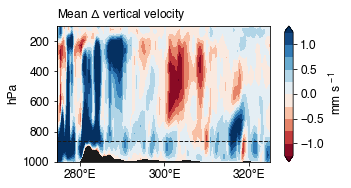

In [139]:
fontsize = 12

fig = mp.figure(figsize=(4,2.5))

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

ax = fig.add_subplot(111)

levels = numpy.arange(-1.25,1.26,0.25)

contour_plot = ax.contourf(xx+360., ptot_400_time_lat_mean/100., wa_diffs_time_lat_mean*1000., \
                           levels=levels, \
                           cmap='RdBu', \
                           extend='both')
ax.tick_params(labelsize=fontsize)
ax.set_ylim(1000,100)
#ax.set_xlim(xlong.min()+65.+360.,xlong.max()-2+360.)
ax.set_xlim(274.5,325.)
#ax.set_xlim(280,320)

ax.text(s='Mean $\Delta$ vertical velocity',\
       x=0, y=1.02, \
       ha='left', va='bottom', \
       fontsize=fontsize, \
       transform=ax.transAxes)

ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('hPa', fontsize=fontsize)
ax.set_facecolor('0.1')
ax.axhline(y=860.,lw=1,ls='--',c='0.1')

fig.tight_layout()

ax_pos = ax.get_position()
cbar_ax = fig.add_axes([ax_pos.x1+0.05, ax_pos.y0, 0.03, ax_pos.height])
cbar = fig.colorbar(contour_plot, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_ticks(levels[1::2])
cbar.set_label('mm s$^{\,-1}$', fontsize=fontsize)

fig.savefig('mean_vertical_velocity_change.png', dpi=600, bbox_inches='tight')

# pull out w for p at 700hPa and below

In [61]:
wa_diffs_alltime = wa_1000-wa_400

In [65]:
ptot_400.shape

(241, 29, 179, 289)

In [70]:
wa_diffs_surf_to_700 = numpy.copy(wa_diffs_alltime)
wa_diffs_surf_to_700[ptot_400<70000.] = numpy.nan

In [74]:
wa_diffs_700_to_top = numpy.copy(wa_diffs_alltime)
wa_diffs_700_to_top[ptot_400>70000.] = numpy.nan

In [75]:
wa_diffs_surf_to_700_map = numpy.nanmean(wa_diffs_surf_to_700, axis=(0,1))

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [76]:
wa_diffs_700_to_top_map = numpy.nanmean(wa_diffs_700_to_top, axis=(0,1))

# plot changes in vertical velocity at different levels in atmosphere

[Text(0,0,'$-20$°'), Text(0,0,'$-10$°'), Text(0,0,'$0$°'), Text(0,0,'$10$°')]

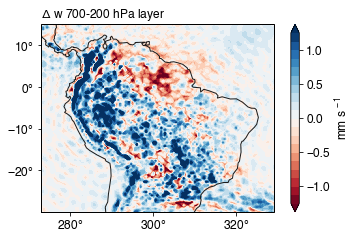

In [131]:
fontsize=12
lon_offset = 25.

diff_levels = numpy.arange(-1.25,1.26,0.125)

fig = mp.figure(figsize=(5,3))
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
ax.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax.coastlines(color='0.1')
contour_plot = ax.contourf(xlong,xlat,wa_diffs_700_to_top_map*1000., \
                             levels=diff_levels, extend='both', \
                             #vmin=diff_levels.min(),vmax=diff_levels.max(),\
                             cmap='RdBu')

ax.text(s="$\Delta$ w 700-200 hPa layer", x=0, y=1.01,\
         ha='left', va='bottom', \
         transform=ax.transAxes, fontsize=fontsize)

fig.tight_layout()

#ax.background_patch.set_facecolor('0.5')

ax_pos = ax.get_position()
cbar = mp.colorbar(contour_plot)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_label('mm s$^{\,-1}$', fontsize=fontsize)
cbar.set_ticks([-1.5,-1,-0.5,0,0.5,1.,1.5])

ax.set_yticks([-20,-10,0,10])
ax.set_xticks([-360+280,-360+300,-360+320])
ax.tick_params(labelsize=fontsize)
ax.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

#fig.savefig('hourly_ptot_below860_change_hour'+ '{:02d}'.format(t)+'.png', dpi=600, bbox_inches='tight', transparent=True)
#mp.close()

[Text(0,0,'$-20$°'), Text(0,0,'$-10$°'), Text(0,0,'$0$°'), Text(0,0,'$10$°')]

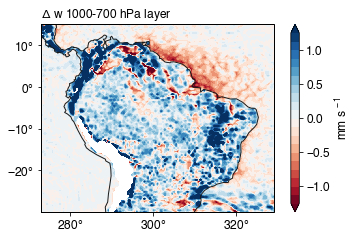

In [132]:
fontsize=12
lon_offset = 25.

diff_levels = numpy.arange(-1.25,1.26,0.125)

fig = mp.figure(figsize=(5,3))
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
ax.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax.coastlines(color='0.1')
contour_plot = ax.contourf(xlong,xlat,wa_diffs_surf_to_700_map*1000., \
                             levels=diff_levels, extend='both', \
                             #vmin=diff_levels.min(),vmax=diff_levels.max(),\
                             cmap='RdBu')

ax.text(s="$\Delta$ w 1000-700 hPa layer", x=0, y=1.01,\
         ha='left', va='bottom', \
         transform=ax.transAxes, fontsize=fontsize)

fig.tight_layout()

ax_pos = ax.get_position()
cbar = mp.colorbar(contour_plot)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_label('mm s$^{\,-1}$', fontsize=fontsize)
cbar.set_ticks([-1.5,-1,-0.5,0,0.5,1.,1.5])

ax.set_yticks([-20,-10,0,10])
ax.set_xticks([-360+280,-360+300,-360+320])
ax.tick_params(labelsize=fontsize)
ax.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])


In [ ]:
ptot_400_time_mean_h12to18 = numpy.mean(ptot_400_lat_subset[12:18,:,:], axis=0)
ptot_400_time_lat_mean_h12to18 = numpy.mean(ptot_400_time_mean_h12to18, axis=1)

w_diffs_time_mean_h12to18 = numpy.mean(w_diffs_lat_subset[12:18,:,:], axis=0)
w_diffs_time_lat_mean_h12to18 = numpy.mean(w_diffs_time_mean_h12to18, axis=1)
w_diffs_time_lat_mean_h12to18_destagger = 0.5*(w_diffs_time_lat_mean_h12to18[:-1,:]+w_diffs_time_lat_mean_h12to18[1:,:])

In [ ]:
ptot_400_time_mean_h18to24 = numpy.mean(ptot_400_lat_subset[24:30,:,:], axis=0)
ptot_400_time_lat_mean_h18to24 = numpy.mean(ptot_400_time_mean_h18to24, axis=1)

w_diffs_time_mean_h18to24 = numpy.mean(w_diffs_lat_subset[24:30,:,:], axis=0)
w_diffs_time_lat_mean_h18to24 = numpy.mean(w_diffs_time_mean_h18to24, axis=1)
w_diffs_time_lat_mean_h18to24_destagger = 0.5*(w_diffs_time_lat_mean_h18to24[:-1,:]+w_diffs_time_lat_mean_h18to24[1:,:])

In [ ]:
fig = mp.figure(figsize=(4,2.5))

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

ax = fig.add_subplot(111)

levels = numpy.arange(-1.25,1.26,0.25)

contour_plot = ax.contourf(xx+360., ptot_400_time_lat_mean_h12to18/100., w_diffs_time_lat_mean_h12to18_destagger*1000., \
                           levels=levels, \
                           cmap='RdBu', \
                           extend='both')
ax.tick_params(labelsize=fontsize)
ax.set_ylim(1000,100)
ax.set_xlim(xlong.min()+65.+360.,xlong.max()-2+360.)

ax.text(s='Mean $\Delta$ vertical velocity (hours 12-18)',\
       x=0, y=1.02, \
       ha='left', va='bottom', \
       fontsize=fontsize, \
       transform=ax.transAxes)

ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('hPa', fontsize=fontsize)
ax.set_facecolor('0.1')
ax.axhline(y=860.,lw=1,ls='--',c='0.1')

fig.tight_layout()

ax_pos = ax.get_position()
cbar_ax = fig.add_axes([ax_pos.x1+0.05, ax_pos.y0, 0.03, ax_pos.height])
cbar = fig.colorbar(contour_plot, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_ticks(levels[1::2])
cbar.set_label('mm s$^{\,-1}$', fontsize=fontsize)

fig.savefig('mean_vertical_velocity_change_hours12to18.png', dpi=600, bbox_inches='tight')

In [ ]:
fig = mp.figure(figsize=(4,2.5))

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

ax = fig.add_subplot(111)

levels = numpy.arange(-1.25,1.26,0.25)

contour_plot = ax.contourf(xx+360., ptot_400_time_lat_mean_h18to24/100., w_diffs_time_lat_mean_h18to24_destagger*1000., \
                           levels=levels, \
                           cmap='RdBu', \
                           extend='both')
ax.tick_params(labelsize=fontsize)
ax.set_ylim(1000,100)
ax.set_xlim(xlong.min()+65.+360.,xlong.max()-2+360.)

ax.text(s='Mean $\Delta$ vertical velocity (hours 18-24)',\
       x=0, y=1.02, \
       ha='left', va='bottom', \
       fontsize=fontsize, \
       transform=ax.transAxes)

ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('hPa', fontsize=fontsize)
ax.set_facecolor('0.1')
ax.axhline(y=860.,lw=1,ls='--',c='0.1')

fig.tight_layout()

ax_pos = ax.get_position()
cbar_ax = fig.add_axes([ax_pos.x1+0.05, ax_pos.y0, 0.03, ax_pos.height])
cbar = fig.colorbar(contour_plot, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_ticks(levels[1::2])
cbar.set_label('mm s$^{\,-1}$', fontsize=fontsize)

fig.savefig('mean_vertical_velocity_change_hours18to24.png', dpi=600, bbox_inches='tight')

# movie of w velocity

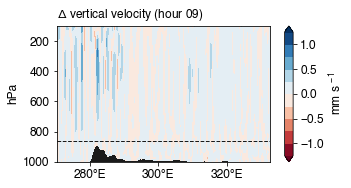

In [40]:
xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]



levels = numpy.arange(-1.25,1.26,0.25)

for t in [8]:#18range(72):
    
    fig = mp.figure(figsize=(4,2.5))
    ax = fig.add_subplot(111)

    contour_plot = ax.contourf(xx+360., ptot_400_lat_mean[t,:,:]/100., w_diffs_lat_mean_destagger[t,:,:]*1000., \
                               levels=levels, \
                               cmap='RdBu', \
                               extend='both')
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(1000,100)
    ax.set_xlim(xlong.min()+65.+360.,xlong.max()-2+360.)

    ax.text(s='$\Delta$ vertical velocity (hour '+'{:02d}'.format(t+1)+')',\
           x=0, y=1.02, \
           ha='left', va='bottom', \
           fontsize=fontsize, \
           transform=ax.transAxes)

    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('hPa', fontsize=fontsize)
    ax.set_facecolor('0.1')
    ax.axhline(y=860.,lw=1,ls='--',c='0.1')

    fig.tight_layout()

    ax_pos = ax.get_position()
    cbar_ax = fig.add_axes([ax_pos.x1+0.05, ax_pos.y0, 0.03, ax_pos.height])
    cbar = fig.colorbar(contour_plot, cax=cbar_ax)
    cbar_ax.tick_params(labelsize=fontsize)
    cbar.set_ticks(levels[1::2])
    cbar.set_label('mm s$^{\,-1}$', fontsize=fontsize)

    #fig.savefig('mean_vertical_velocity_change_hours18to24.png', dpi=600, bbox_inches='tight')

# time mean climatology and differences

In [ ]:
fontsize = 12
lon_offset = 25.

# RAINTOT

levels = numpy.arange(-1,1.1,0.25)
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
ax1.gridlines(ylocs=[0], color='0.25')
ax1.coastlines(resolution='110m')
ax1.set_extent([xlong.min()+lon_offset, xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())

In [67]:
fontsize=12
lon_offset = 25.

diff_levels = numpy.arange(-1,1.1,0.2)

t = 10
for t in range(48):#
    
    fig = mp.figure(figsize=(5,3))
    ax1 = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
    ax1.set_extent([xlong.min()+lon_offset, xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
    ax1.coastlines(color='0.1')
    contour_plot1 = ax1.contourf(xlong,xlat,qvapor_diffs_vint_alltime[t,:,:], \
                                 levels=diff_levels, \
                                 cmap='RdBu',extend='both')
    
    ax1.text(s="$\Delta$ column-int. water vapor", x=0, y=1.01,\
             ha='left', va='bottom', \
             transform=ax1.transAxes, fontsize=fontsize)
    ax1.text(s='hour '+'{:02d}'.format(t), x=1, y=1.01, \
             ha='right', va='bottom', transform=ax1.transAxes, \
             fontsize=fontsize)
    #ax1.contour(xlong,xlat,qvapor_diffs_vint_alltime[t,:,:],levels=[10,20,30,40,50],colors='1',linewidths=0.25)
    
    fig.tight_layout()

    ax1_pos = ax1.get_position()
    cbar1 = mp.colorbar(contour_plot1)
    cbar1.ax.tick_params(labelsize=fontsize)
    cbar1.set_label('mm', fontsize=fontsize)

    fig.savefig('hourly_vint_cwv_change_hour'+ '{:02d}'.format(t)+'.png', dpi=600, bbox_inches='tight', transparent=True)
    mp.close()

In [ ]:
fontsize=12
lon_offset = 25.

fig = mp.figure(figsize=(3.25,4.5))

clim_levels = numpy.arange(0,56,5)
diff_levels = numpy.arange(-1,1.1,0.2)

ax1 = fig.add_subplot(211, projection=cartopy.crs.PlateCarree())
ax1.set_extent([xlong.min()+lon_offset, xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
ax1.coastlines(color='0.1')
contour_plot1 = ax1.contourf(xlong,xlat,cont_prw_time_mean, levels=clim_levels, cmap='YlGnBu',extend='max')
ax1.text(s='Climatological column water vapor', x=0, y=1.02,\
         ha='left', va='bottom', \
         transform=ax1.transAxes, fontsize=fontsize)
ax1.contour(xlong,xlat,cont_prw_time_mean,levels=[10,20,30,40,50],colors='1',linewidths=0.25)
         
ax2 = fig.add_subplot(212, projection=cartopy.crs.PlateCarree())
ax2.set_extent([xlong.min()+lon_offset, xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
ax2.coastlines(color='0.1')
contour_plot2 = ax2.contourf(xlong,xlat,qvapor_vint_diffs_time_mean,levels=diff_levels, cmap='RdBu',extend='both')
ax2.text(s='Column water vapor anomalies', x=0, y=1.02,\
         ha='left', va='bottom', \
         transform=ax2.transAxes, fontsize=fontsize)


fig.tight_layout(h_pad=2)

ax1_pos = ax1.get_position()
cbar1_ax = fig.add_axes([ax1_pos.x1+0.01,ax1_pos.y0,0.05,ax1_pos.height])
cbar1 = mp.colorbar(contour_plot1, cax=cbar1_ax)
cbar1.ax.tick_params(labelsize=fontsize)
cbar1.set_label('mm', fontsize=fontsize)

ax2_pos = ax2.get_position()
cbar2_ax = fig.add_axes([ax2_pos.x1+0.01,ax2_pos.y0,0.05,ax2_pos.height])
cbar2 = mp.colorbar(contour_plot2, cax=cbar2_ax)
cbar2.ax.tick_params(labelsize=fontsize)
cbar2.set_label('mm', fontsize=fontsize)

fig.savefig('vint_cwv_clim_and_anomalies_time_mean.png', dpi=600, bbox_inches='tight', transparent=True)

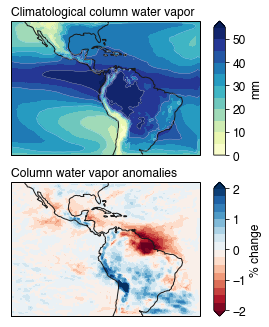

In [45]:
fontsize=12
lon_offset = 25.

fig = mp.figure(figsize=(3.25,4.5))

clim_levels = numpy.arange(0,56,5)
diff_levels = numpy.arange(-2,2.1,0.25)

ax1 = fig.add_subplot(211, projection=cartopy.crs.PlateCarree())
ax1.set_extent([xlong.min()+lon_offset, xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
ax1.coastlines(color='0.1')
contour_plot1 = ax1.contourf(xlong,xlat,cont_prw_time_mean, levels=clim_levels, cmap='YlGnBu',extend='max')
ax1.text(s='Climatological column water vapor', x=0, y=1.02,\
         ha='left', va='bottom', \
         transform=ax1.transAxes, fontsize=fontsize)
ax1.contour(xlong,xlat,cont_prw_time_mean,levels=[10,20,30,40,50],colors='1',linewidths=0.25)
         
ax2 = fig.add_subplot(212, projection=cartopy.crs.PlateCarree())
ax2.set_extent([xlong.min()+lon_offset, xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
ax2.coastlines(color='0.1')
contour_plot2 = ax2.contourf(xlong,xlat,(qvapor_vint_diffs_time_mean/cont_prw_time_mean)*100.,\
                             levels=diff_levels, \
                             cmap='RdBu',extend='both')
ax2.text(s='Column water vapor anomalies', x=0, y=1.02,\
         ha='left', va='bottom', \
         transform=ax2.transAxes, fontsize=fontsize)


fig.tight_layout(h_pad=2)

ax1_pos = ax1.get_position()
cbar1_ax = fig.add_axes([ax1_pos.x1+0.01,ax1_pos.y0,0.05,ax1_pos.height])
cbar1 = mp.colorbar(contour_plot1, cax=cbar1_ax)
cbar1.ax.tick_params(labelsize=fontsize)
cbar1.set_label('mm', fontsize=fontsize)

ax2_pos = ax2.get_position()
cbar2_ax = fig.add_axes([ax2_pos.x1+0.01,ax2_pos.y0,0.05,ax2_pos.height])
cbar2 = mp.colorbar(contour_plot2, cax=cbar2_ax)
cbar2.ax.tick_params(labelsize=fontsize)
cbar2.set_label('% change', fontsize=fontsize)
cbar2.set_ticks([-2,-1,0,1,2])

fig.savefig('vint_cwv_clim_and_anomalies_PERCENT_CHANGE_time_mean.png', dpi=600, bbox_inches='tight', transparent=True)

# plot water vapor climatology and differences

In [46]:
fontsize=12

fig = mp.figure(figsize=(3,4))

levels=
contour_levels_left = numpy.arange(-50,51,10)
plot_locations = [1,2,6,7,11,12,16,17]
ax_list_left = []
for i in range(plot_locations.__len__()):
    ax = fig.add_subplot(4,5,plot_locations[i], projection=cartopy.crs.PlateCarree())
    contour_plot_left = ax.contourf(xlong,xlat,lh_diffs_landmask[i,:,:], levels=contour_levels_left, \
                                    cmap='RdBu', extend='both')
    ax.text(s='h '+hour_strings[i], x=0.05, y=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)
    ax.coastlines(resolution='110m')
    ax_list_left.append(ax)
ax_list_left[0].text(s='(a) $\Delta$ latent cooling (3-hr means)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list_left[0].transAxes)



SyntaxError: invalid syntax (<ipython-input-46-23931549a86b>, line 5)